In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Отбор признаков

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [4]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [5]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<Axes: xlabel='engine-type', ylabel='Count'>

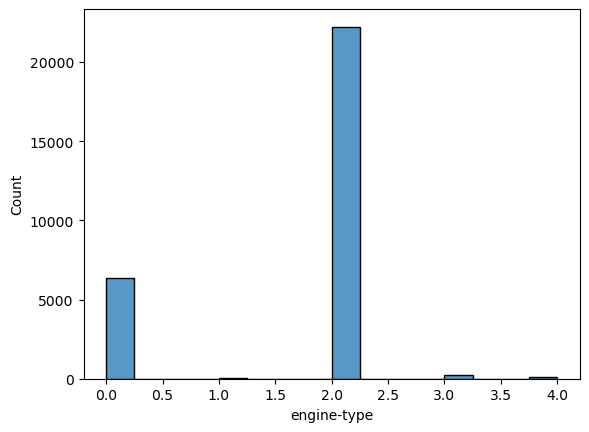

In [6]:
sns.histplot(data=train_X, x='engine-type')

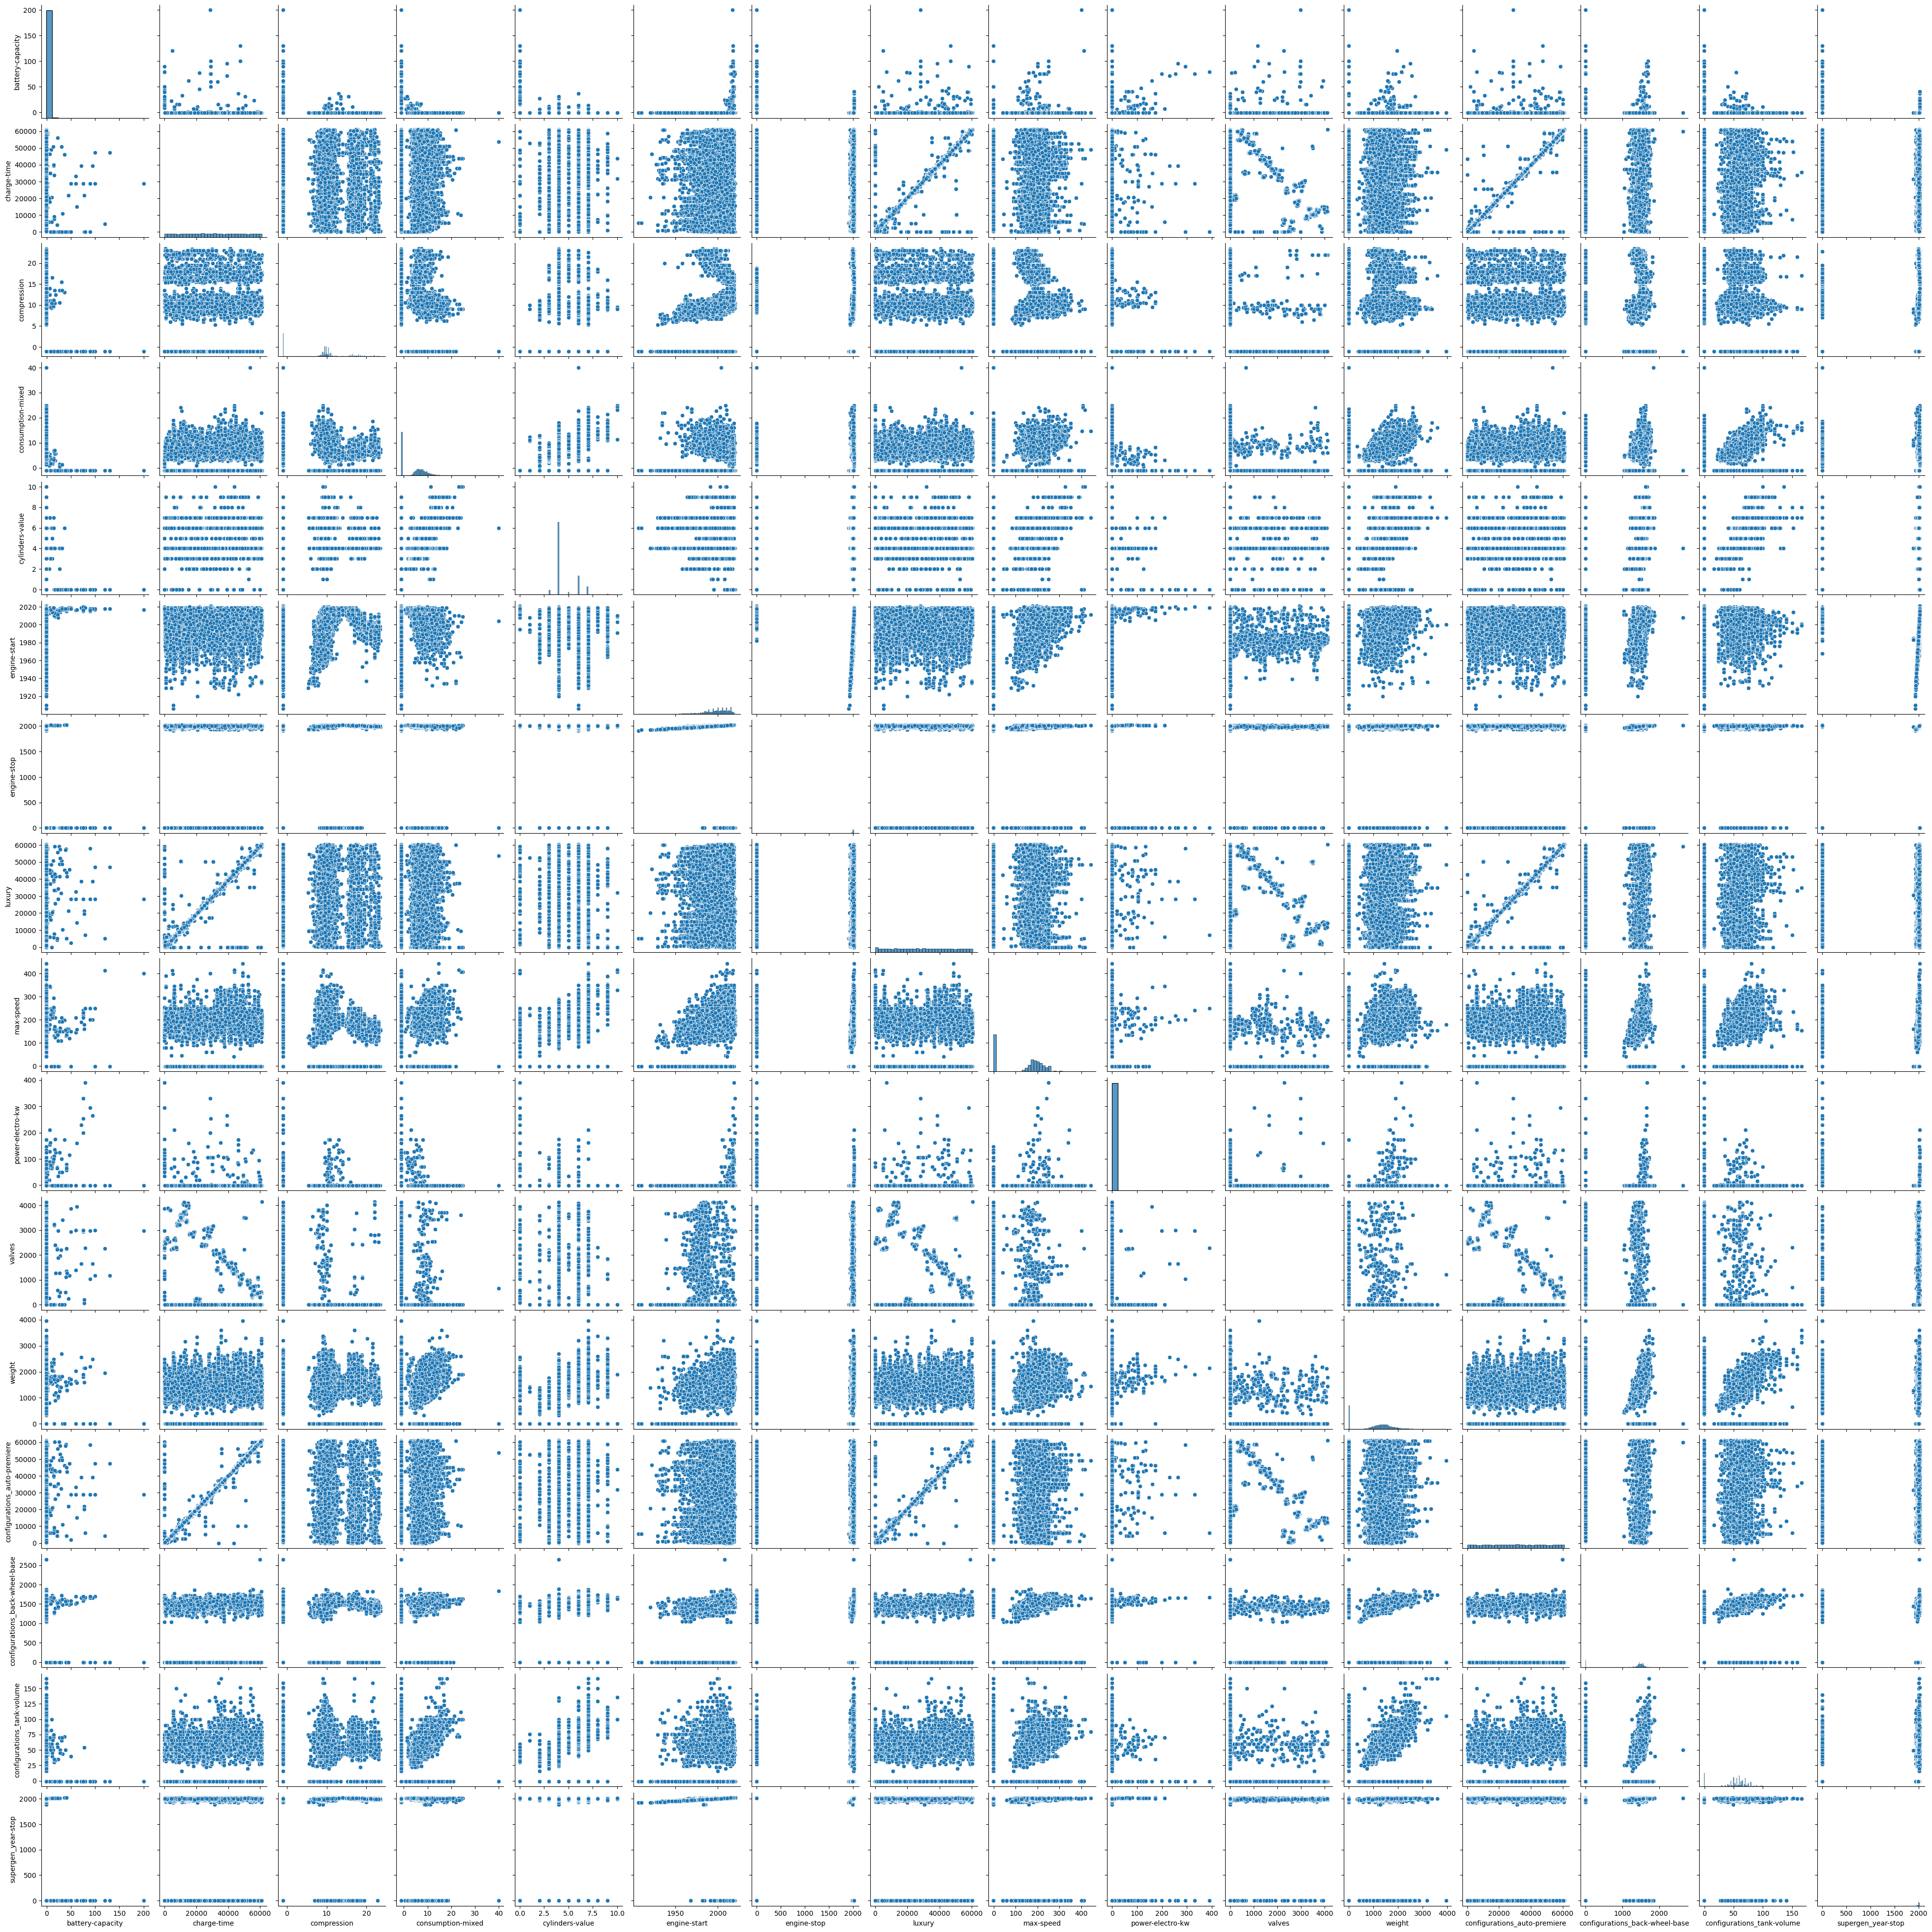

In [7]:
sns.pairplot(train_X[numerical]);

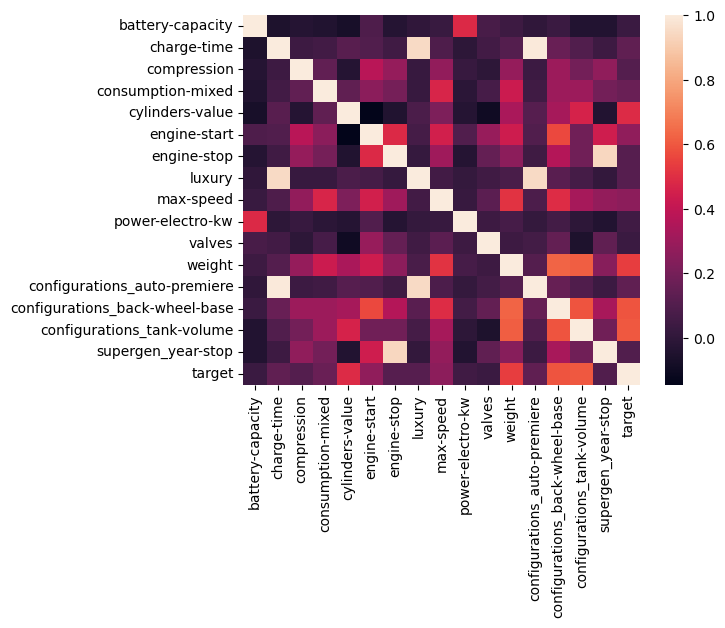

In [8]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [9]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955585 p-value: 9.725646829239856e-79


In [10]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667100187 p-value: 5.610547363607709e-05


## F-test

In [11]:
from sklearn.feature_selection import f_regression, SelectKBest

In [12]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\Users\Maksim\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 0.00000000e+000])

In [14]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

C:\Users\Maksim\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.4300e+03],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  2.3000e+01,
         0.0000e+00,  2.4400e+03],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  1.0000e+01,
         0.0000e+00,  2.6850e+03],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ...,  2.6000e+01,
         0.0000e+00,  2.6700e+03],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.5000e+03],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  3.5000e+01,
         0.0000e+00,  2.8800e+03]])

In [15]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial', 'target'],
      dtype=object)

## Значения Шепли

In [16]:
import shap
train_X = train_X.drop(columns=["target"], errors="ignore")
pd.set_option('display.max_columns', None)

In [17]:
reg = LinearRegression().fit(train_X, train_y)

In [18]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

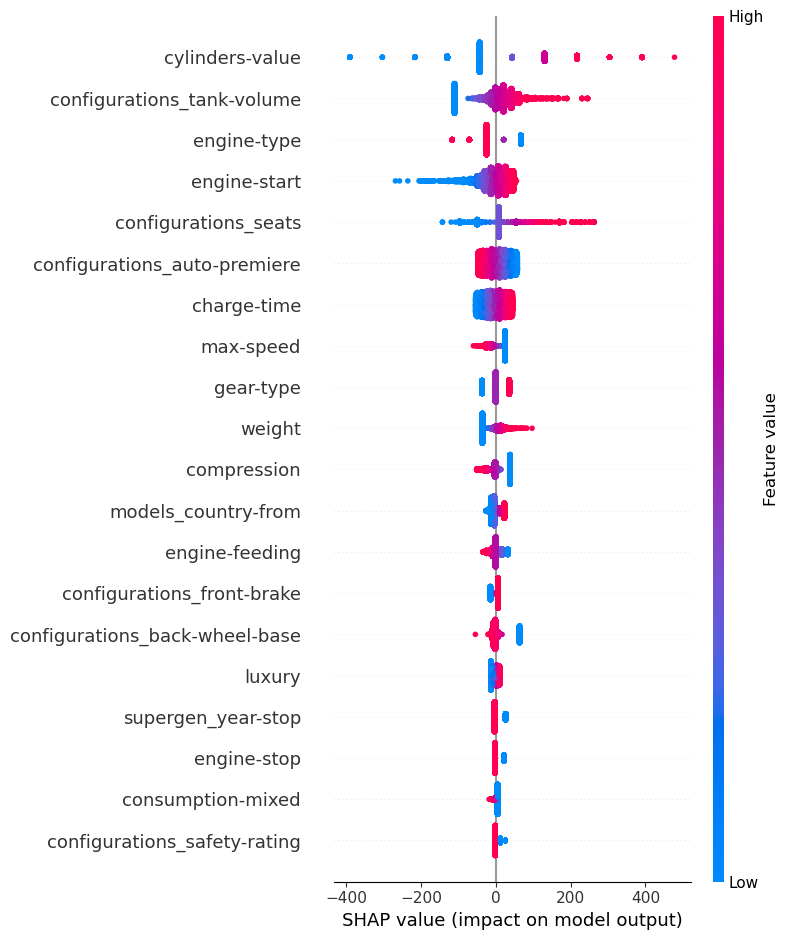

In [19]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [20]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

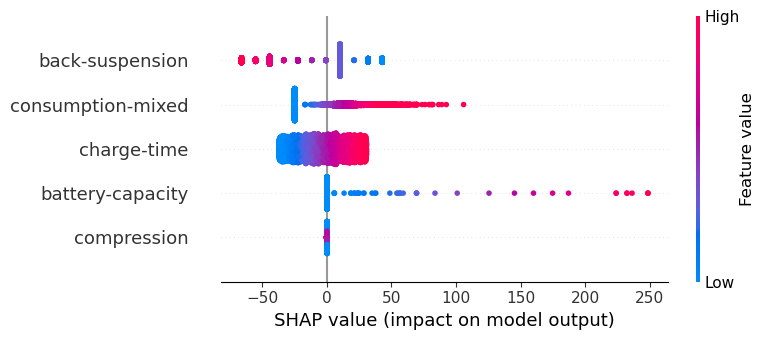

In [21]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [29]:
df

index  back-suspension  battery-capacity  charge-time  compression  \
0          0                9              -1.0        36457          9.0   
1          2                3              -1.0        44872          8.0   
2          4                3              -1.0        55927         16.0   
3          5                0              -1.0        41405         10.3   
4          7                8              -1.0        22523         19.0   
...      ...              ...               ...          ...          ...   
43240  61224                9              -1.0        34558         11.2   
43241  61225                3              -1.0        38268          9.6   
43242  61226                3              -1.0         8958         10.0   
43243  61227                3              -1.0        20293          8.5   
43244  61228               10              -1.0        52459          8.6   

       consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                    4.3                0                3               4   
1                   -1.0                3                7               4   
2                    4.2                0                4               5   
3                   -1.0                0                4               4   
4                   -1.0                0                4               8   
...                  ...              ...              ...             ...   
43240                6.6                0                4               4   
43241                5.8                0                4               2   
43242                9.3                0                4               4   
43243               -1.0                0                5               4   
43244               -1.0                0                4               4   

       engine-start  engine-stop  engine-type  gear-type  luxury  max-speed  \
0              2006         2018            2          1   36646       -1.0   
1              1982         1993            2          2   44289      217.0   
2              2014         2018            0          1   55481      193.0   
3              2000         2003            2          1   40914      189.0   
4              2000         2005            0          1   22118      185.0   
...             ...          ...          ...        ...     ...        ...   
43240          2004         2016            2          1   34747      175.0   
43241          2013         2015            2          1   37929      242.0   
43242          1991         1999            2          1    8324      170.0   
43243          2002         2004            2          0   19806      250.0   
43244          1982         1984            2          2   51505       -1.0   

       power-electro-kw  supply-system  valves  valvetrain  weight  \
0                  -1.0              0       2           0   820.0   
1                  -1.0              0    1354           0  2350.0   
2                  -1.0              0       2           0  1350.0   
3                  -1.0              1       0           1  1090.0   
4                  -1.0              3       0           1  1410.0   
...                 ...            ...     ...         ...     ...   
43240              -1.0              0       2           0    -1.0   
43241              -1.0              3       2           0  1545.0   
43242              -1.0              0       2           1  1210.0   
43243              -1.0              3       2           0  1660.0   
43244              -1.0              0       0           1    -1.0   

       configurations_auto-premiere  configurations_back-wheel-base  \
0                             36479                          1300.0   
1                             44895                          1555.0   
2                             55963                          1534.0   
3                             41425                          1495.0   


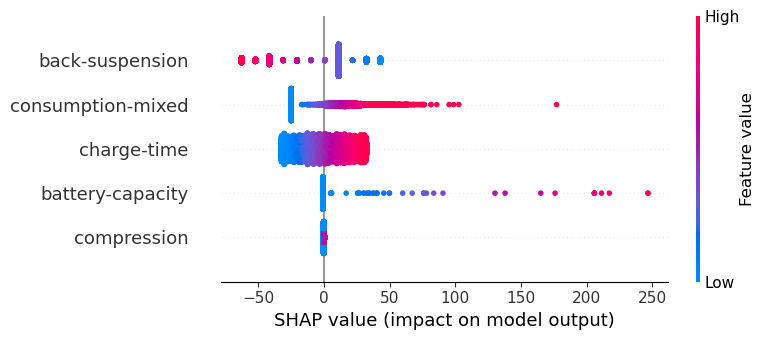

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=13)

train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

## Пермутационная важность

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [ ]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

#### Реализую обучение методом Random Forest

In [ ]:
df = df.replace(-1, np.nan).dropna()
X = df.drop(columns=["target", "index"])
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance

In [ ]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Greens_r")

plt.xlabel("Пермутационная важность")
plt.ylabel("Признаки")
plt.title("Пермутационная важность признаков")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor 
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

df = df.replace(-1, np.nan).dropna() 

X = df.drop(columns=["target", "index"]) 
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

model = RandomForestRegressor(n_estimators=100, random_state=1337)
model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=1337)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Greens_r")

plt.xlabel("Пермутационная важность")
plt.ylabel("Признаки")
plt.title("Пермутационная важность признаков")
plt.show()


#### Реализую обучение линейной регрессии

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

df = df.replace(-1, np.nan).dropna()

X = df.drop(columns=["target", "index"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")

plt.xlabel("Пермутационная важность")
plt.ylabel("Признаки")
plt.title("Пермутационная важность признаков (Linear Regression)")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

df = df.replace(-1, np.nan).dropna()

X = df.drop(columns=["target", "index"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=228)

model = LinearRegression()
model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=228)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")

plt.xlabel("Пермутационная важность")
plt.ylabel("Признаки")
plt.title("Пермутационная важность признаков (Linear Regression)")
plt.show()

Вывод:

- При обучении линейной регрессии результат стабильнее и менее подвержен влиянию случайности как в RandomForest
- При обучении линейной регрессии результат получился ближе к тому, что мы сделали на занятии вне зависимости от random state.